In [ ]:
#Tegutsesin colabis, oli lihtsam

In [ ]:
!pip install plotly
!pip install cufflinks

In [22]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import plotly.express as px

In [40]:
train = pd.read_csv('train_for_gif.csv', sep=";")

In [41]:
train.head() #0_x is ev charging current, 0_y is baseload current

,Unnamed: 0,index,address,cadaster,latitude,longitude,x,y,max_current,public_chargers,home_chargers,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,10_y,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20_y,21_y,22_y,23_y
0,24,138,"Juure, Jaamamõisa, Tartu linn, Tartu, Tartu li...",79301:001:0342,58.383253,26.764144,6474748.69,661646.72,100,0.0,1.0,7.2,7.2,0.0,0.0,7.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.2,7.2,0.0,0.0,43.085689,27.219903,37.226985,33.587168,30.532611,38.310797,50.487424,47.217521,43.578974,45.743862,36.197258,45.500228,41.822294,48.759855,39.381768,41.946460,48.407753,48.198700,46.375032,48.143367,42.328719,35.826586,48.375035,42.896676
1,16,15,"33, Viljandi mnt, Maarjamõisa, Tartu linn, Tar...",79502:019:0018,58.370127,26.689523,6473103.15,657342.63,60,2.0,5.0,84.2,40.2,33.0,22.0,0.0,38.5,0.0,0.0,0.0,45.7,66.0,0.0,44.0,0.0,22.0,0.0,22.0,23.7,7.2,67.7,0.0,55.0,23.7,7.2,79.995283,68.110978,48.466686,70.917465,43.575427,41.014364,75.954881,53.692525,93.099298,70.624213,72.380735,71.295732,74.266680,62.560722,63.129722,71.452590,80.789491,78.605374,83.275353,69.291341,87.294980,90.960876,68.542676,73.093613
2,8,193,"68a/3, Puiestee, Raadi-Kruusamäe, Tartu linn, ...",79512:032:0012,58.390462,26.727509,6475460.14,659468.49,160,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.2,7.2,0.0,0.0,0.0,7.2,7.2,0.0,0.0,7.2,0.0,0.0,0.0,0.0,0.0,0.0,36.859454,24.384204,42.659863,34.714995,29.641593,27.318412,41.759503,42.054959,44.476428,40.462273,45.447998,51.700038,54.268805,42.412902,57.000000,37.749564,46.723661,48.290400,54.797779,52.671071,47.350626,45.199859,47.173830,41.957258
3,15,168,"16a, Roosi, Ülejõe, Tartu linn, Tartu, Tartu l...",79514:014:0021,58.385042,26.730641,6474849.44,659676.18,160,1.0,4.0,51.7,29.7,23.1,6.6,6.6,0.0,0.0,7.2,0.0,6.6,23.7,6.6,16.5,23.1,13.8,6.6,23.7,6.6,0.0,0.0,28.6,51.7,0.0,0.0,25.561742,34.515704,42.755236,34.533194,34.194738,32.276497,52.200273,57.000000,57.000000,50.798240,39.649469,39.679657,43.217380,43.789523,42.744132,55.933350,44.871371,48.399381,52.284646,43.269583,44.919531,37.376938,36.109098,45.307183
4,12,59,"2, Juhan Liivi, Kesklinn, Tartu linn, Tartu, T...",79507:022:0008,58.378215,26.714904,6474067.16,658809.66,160,3.0,2.0,13.8,7.2,0.0,6.6,6.6,13.8,0.0,0.0,44.0,50.6,22.0,28.6,50.6,23.1,60.5,28.6,23.1,0.0,0.0,0.0,13.8,0.0,6.6,0.0,152.551035,148.046867,96.830484,146.926278,137.213011,86.854798,139.900387,139.283876,140.451160,173.291836,142.489328,168.850415,159.013063,159.637415,164.057110,122.495332,178.333348,147.735354,163.163628,167.412285,165.004095,161.251106,172.177444,155.879436


In [42]:
train.describe()

,Unnamed: 0,index,latitude,longitude,x,y,max_current,public_chargers,home_chargers,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,10_y,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20_y,21_y,22_y,23_y
count,29.000000,29.000000,29.000000,29.000000,2.900000e+01,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,17.620690,108.034483,58.370141,26.724094,6.473192e+06,659358.077931,126.896552,1.413793,2.655172,31.727586,18.541379,14.175862,7.400000,5.162069,5.486207,1.462069,6.662069,6.396552,23.675862,16.631034,8.789655,14.555172,7.251724,10.441379,10.786207,6.434483,8.813793,10.634483,11.965517,9.779310,12.475862,12.500000,9.265517,71.853186,68.170453,64.805385,65.972325,67.142042,60.266048,84.949489,85.959789,82.843131,84.396974,81.274761,86.629616,83.355847,87.455910,84.534789,82.052795,84.825976,86.322040,86.544340,84.449570,88.643974,83.022945,78.001726,78.718926
std,10.896965,59.164108,0.016977,0.029291,1.878451e+03,1724.276794,49.935920,1.427216,2.438909,31.536927,21.552320,16.603822,9.906419,10.640637,10.412860,5.599006,12.218061,10.979705,27.768606,25.820079,12.182492,20.958830,15.316695,15.389456,16.489363,12.023557,12.398062,13.926729,17.096371,14.495452,16.840038,14.041724,12.556878,39.820449,36.485473,30.772521,36.797071,35.890113,27.100820,43.598795,42.366602,40.466336,44.002819,39.871359,44.633088,38.202301,41.665951,44.698705,39.127894,39.529899,43.143218,44.133068,39.201782,44.772542,42.554493,37.224324,40.560134
min,0.000000,4.000000,58.346532,26.683184,6.470565e+06,657076.560000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.561742,24.384204,25.716978,25.596896,29.413523,27.318412,33.576159,33.508237,28.947239,39.244072,36.197258,38.022967,38.604364,40.899080,26.915228,37.749564,38.546428,34.100254,36.855538,43.269583,36.721894,35.826586,36.109098,34.072895
25%,9.000000,59.000000,58.355604,26.703113,6.471602e+06,658197.650000,100.000000,1.000000,1.000000,7.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.859454,40.458040,37.226985,34.714995,35.931372,36.353239,50.487424,53.692525,47.659592,48.193249,46.531798,46.238816,46.602298,48.759855,46.280564,44.947477,48.407753,48.399381,50.338595,49.143169,52.214057,45.199859,48.375035,42.896676
50%,18.000000,115.000000,58.370127,26.722256,6.473103e+06,659106.950000,160.000000,1.000000,2.000000,29.200000,13.800000,6.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.500000,6.600000,6.600000,6.600000,0.000000,6.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.600000,7.200000,0.000000,58.165353,56.392090,60.284219,52.322158,59.285251,59.322145,73.499865,68.290671,72.441767,70.624213,67.650596,73.338518,77.138304,80.413408,73.261853,71.863841,77.136553,71.761823,75.764905,70.374721,77.516068,78.205518,66.351302,69.081460
75%,27.000000,157.000000,58.383253,26.731004,6.474637e+06,659795.210000,160.000000,2.000000,4.000000,46.800000,29.700000,23.100000,16.500000,6.600000,6.600000,0.000000,7.200000,7.200000,29.200000,22.000000,16.500000,16.500000,6.600000,13.800000,16.500000,6.600000,16.500000,22.000000,22.000000,16.500000,16.

In [106]:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

mini = train[["cadaster","x","y","max_current","6_x","6_y"]]

mini["current"] = mini["6_x"]+mini["6_y"]
mini["orange"] = mini["6_y"]>mini["max_current"]
mini["red"] = mini["current"]>mini["max_current"]
mini

,cadaster,x,y,max_current,6_x,6_y,current,orange,red
0,79301:001:0342,6474748.69,661646.72,100,0.0,50.487424,50.487424,False,False
1,79502:019:0018,6473103.15,657342.63,60,0.0,75.954881,75.954881,True,True
2,79512:032:0012,6475460.14,659468.49,160,0.0,41.759503,41.759503,False,False
3,79514:014:0021,6474849.44,659676.18,160,0.0,52.200273,52.200273,False,False
4,79507:022:0008,6474067.16,658809.66,160,0.0,139.900387,139.900387,False,False
5,79509:013:0018,6470765.10,658458.10,60,0.0,33.576159,33.576159,False,False
6,79517:025:0023,6470809.18,662517.67,200,0.0,125.384383,125.384383,False,False
7,79301:001:0667,6470565.41,661536.17,200,0.0,37.529780,37.529780,False,False
8,79511:003:0022,6471601.92,659795.21,200,0.0,127.975080,127.975080,False,False
9,79517:053:0014,6472095.69,662802.05,60,0.0,51.663008,51.663008,False,False


In [76]:
green = mini[np.logical_and(mini["orange"]==False, mini["red"]==False)]
orange = mini[mini["orange"] == True]
red = mini[np.logical_and(mini["orange"]==False, mini["red"]==True)]

,cadaster,x,y,max_current,0_x,0_y,current,orange,red
4,79507:022:0008,6474067.16,658809.66,160,13.8,152.551035,166.351035,False,True
9,79517:053:0014,6472095.69,662802.05,60,38.5,26.835890,65.335890,False,True
11,79517:065:0006,6471847.19,663240.01,60,38.5,38.981273,77.481273,False,True
18,79512:047:0004,6476574.18,659106.95,100,49.5,54.609399,104.109399,False,True
26,79514:037:0108,6476815.24,657607.93,100,67.7,59.266463,126.966463,False,True
27,79501:028:0018,6474221.57,658438.35,160,30.3,134.419430,164.719430,False,True


In [117]:
!mkdir scatter

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warn

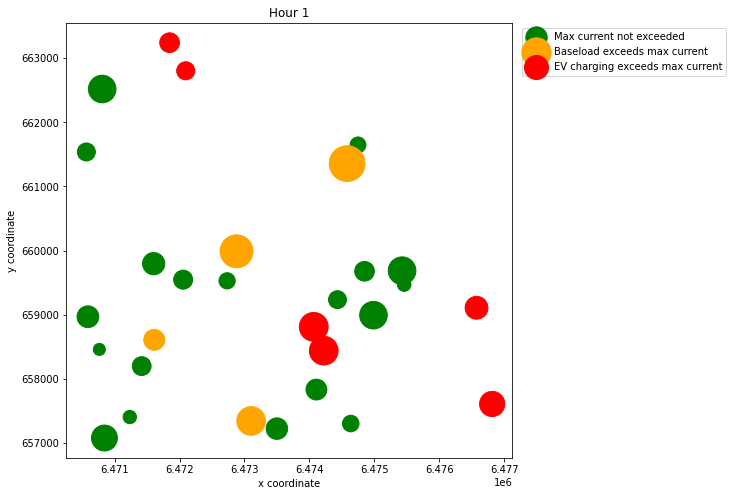

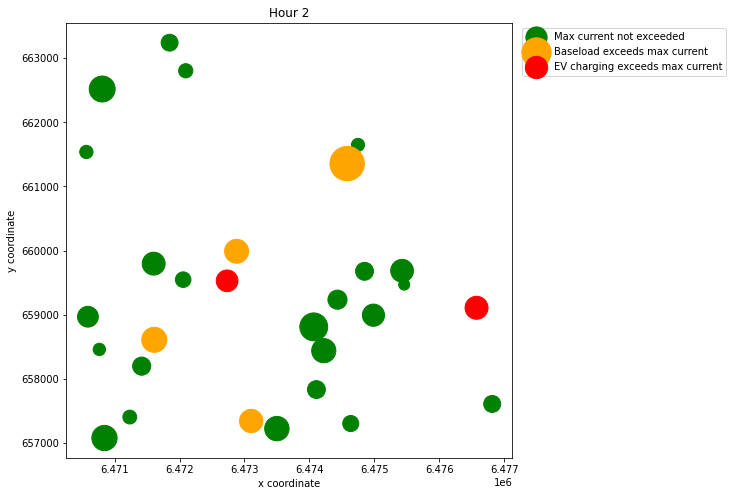

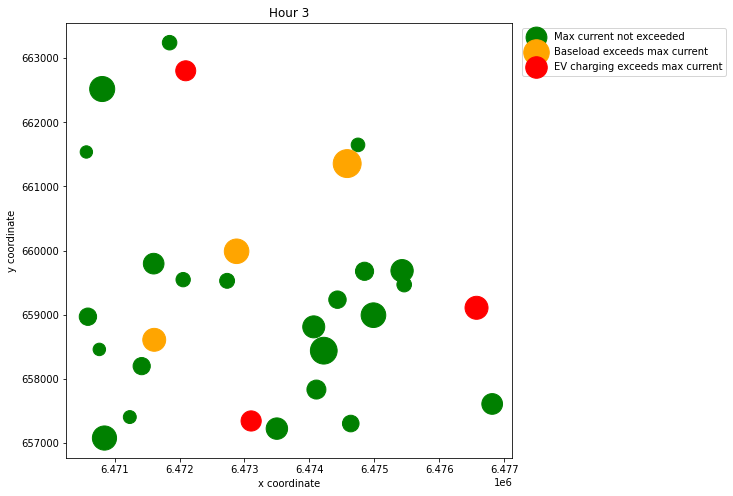

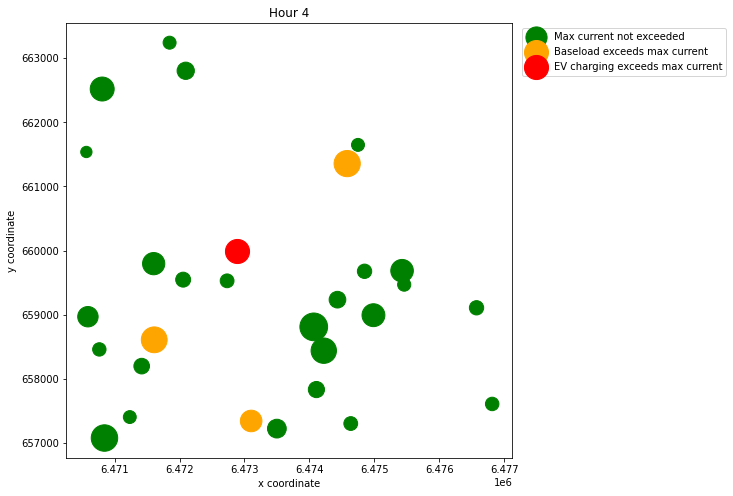

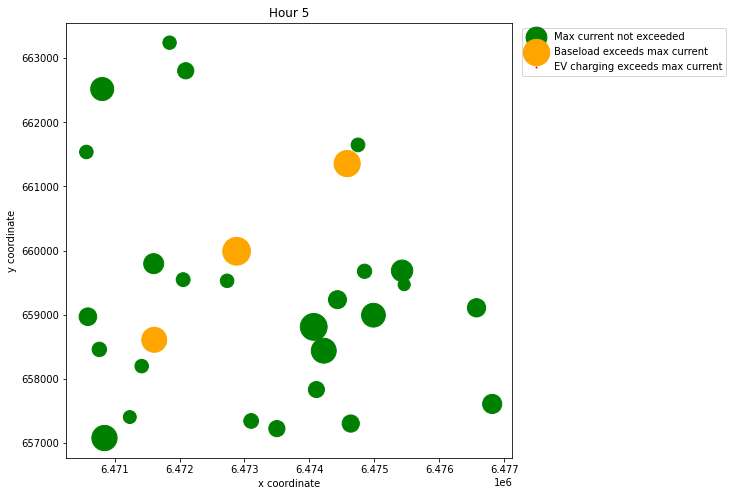

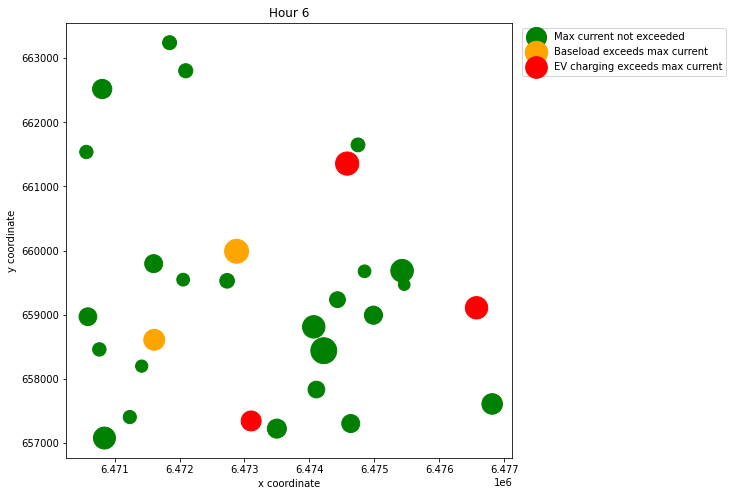

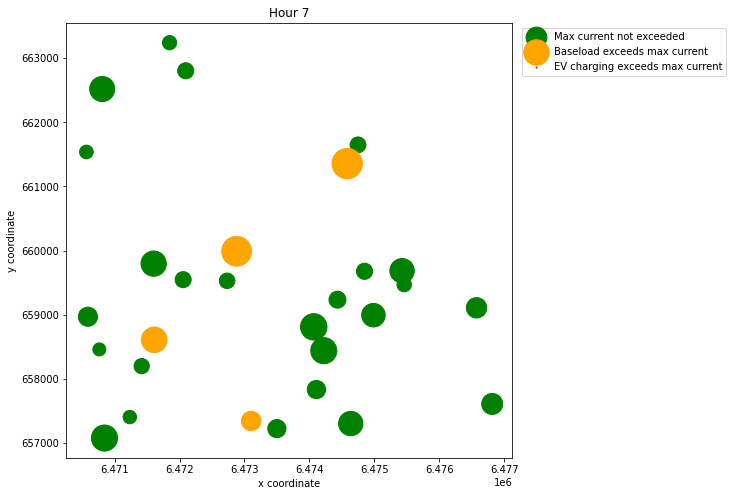

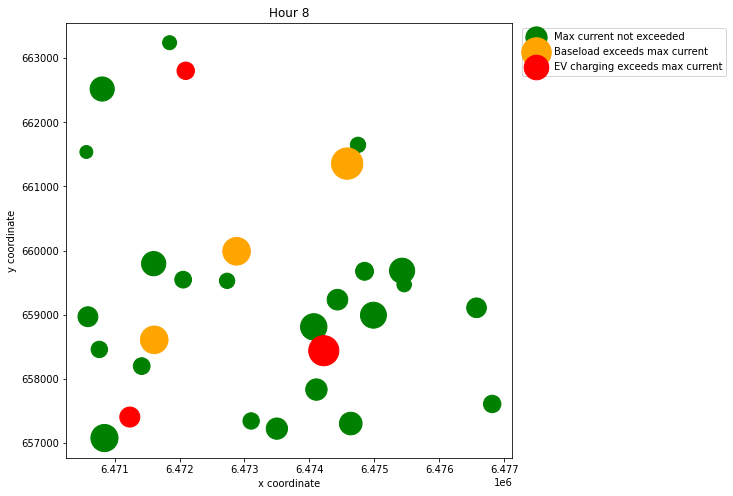

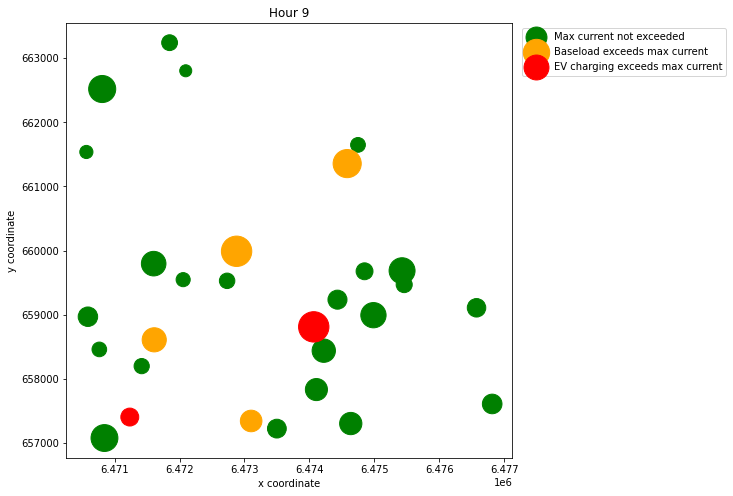

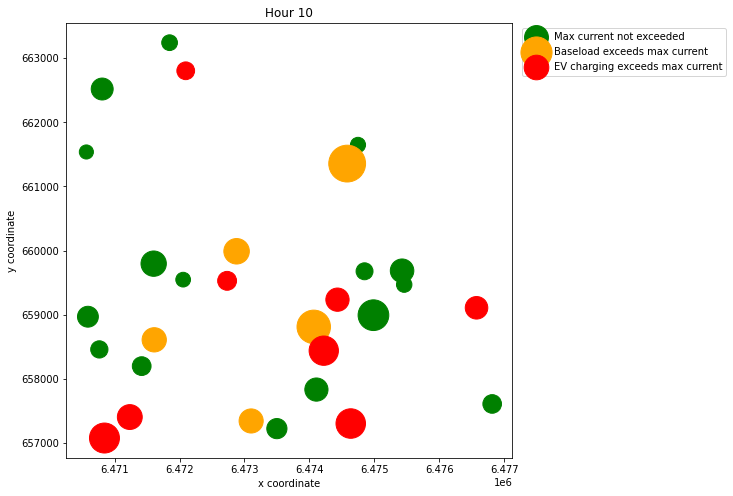

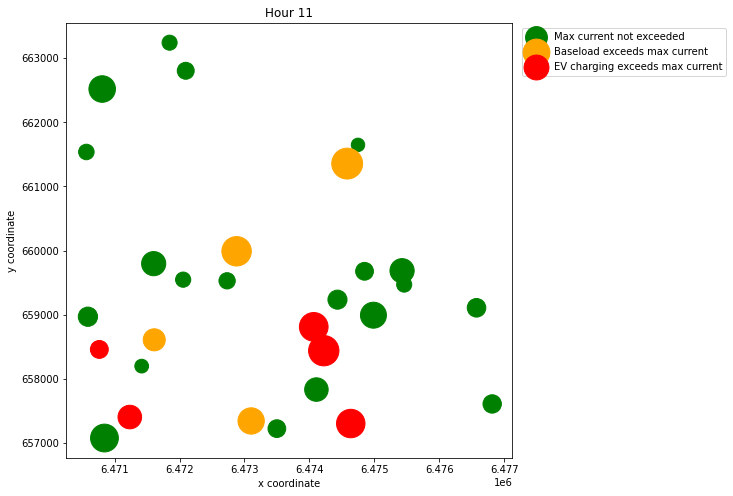

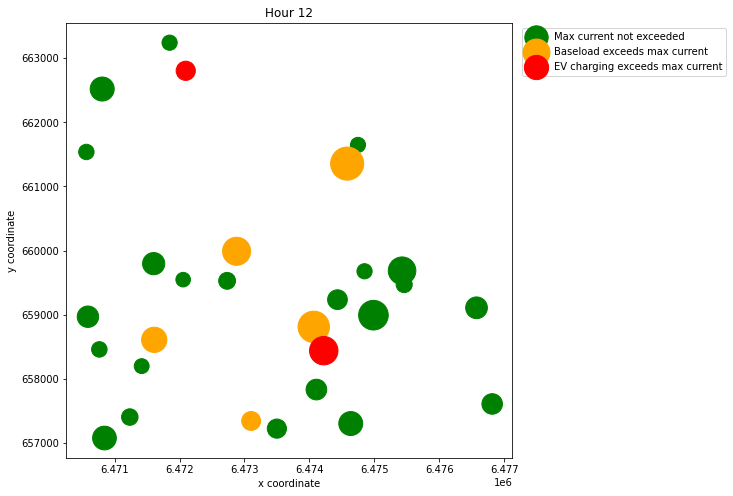

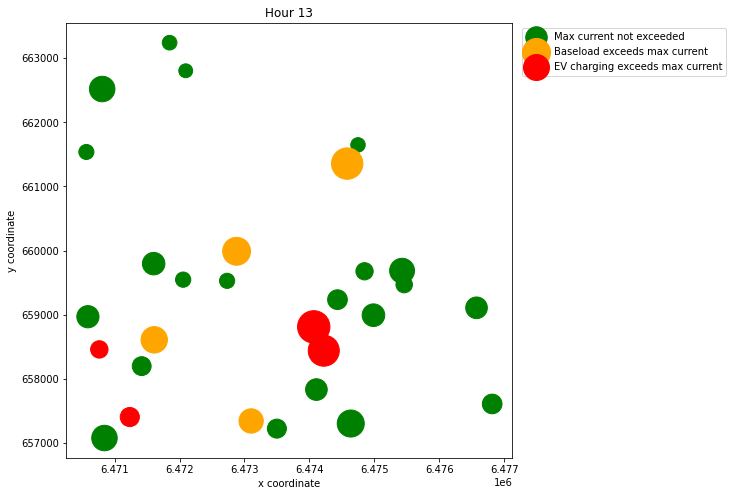

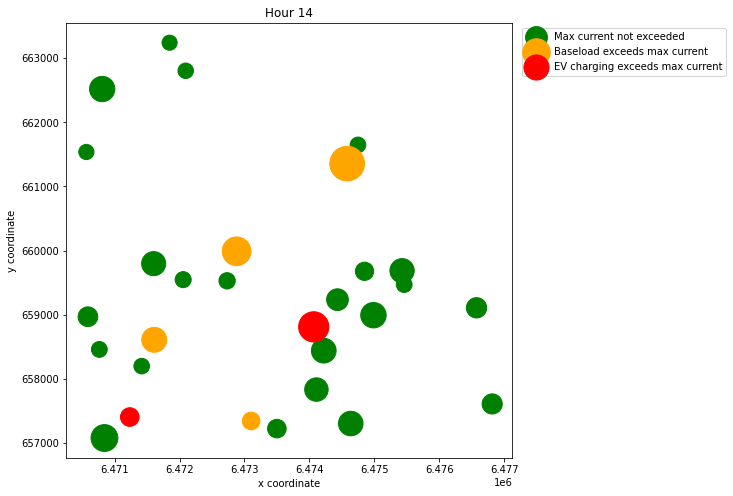

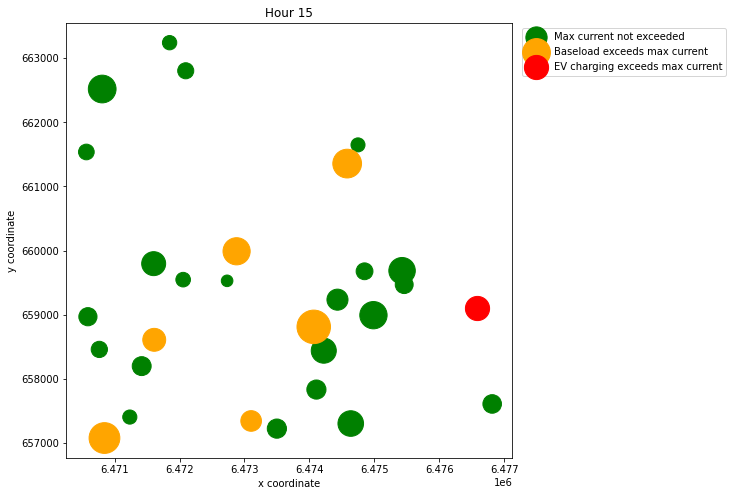

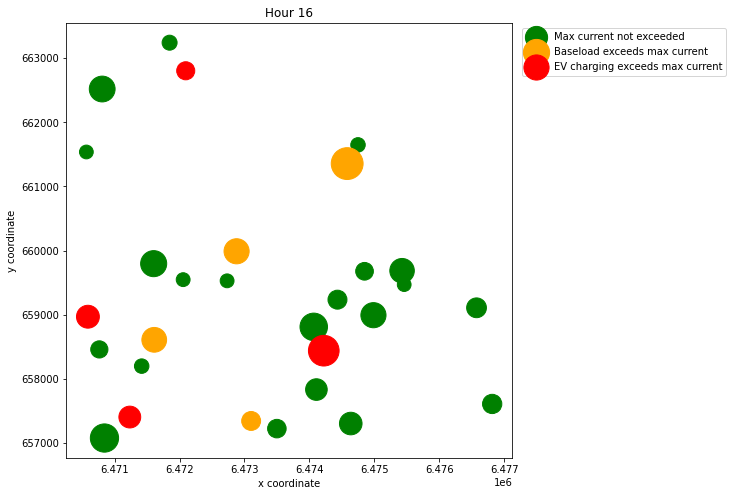

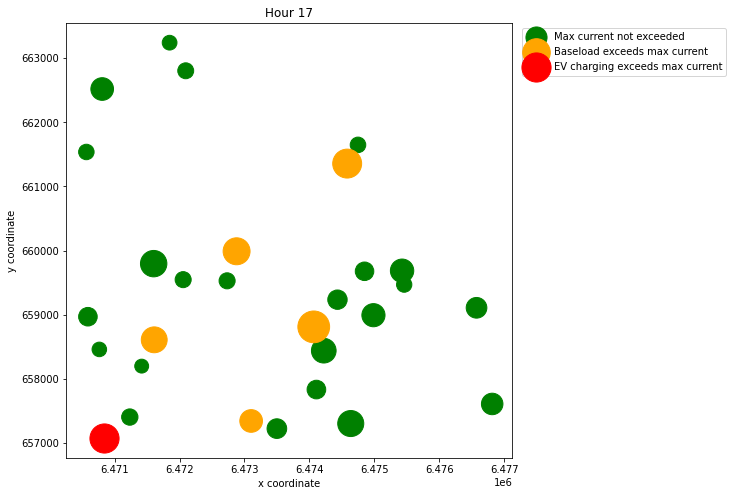

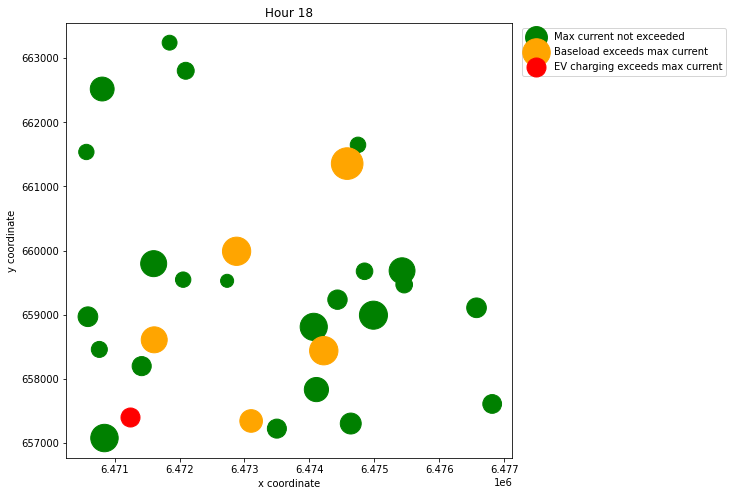

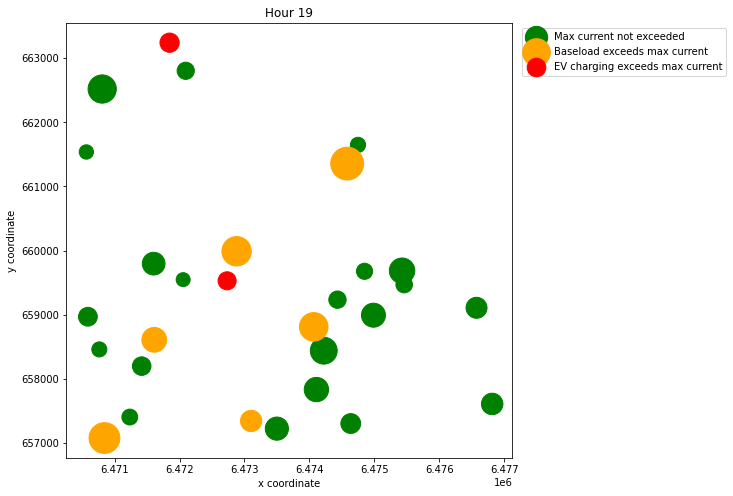

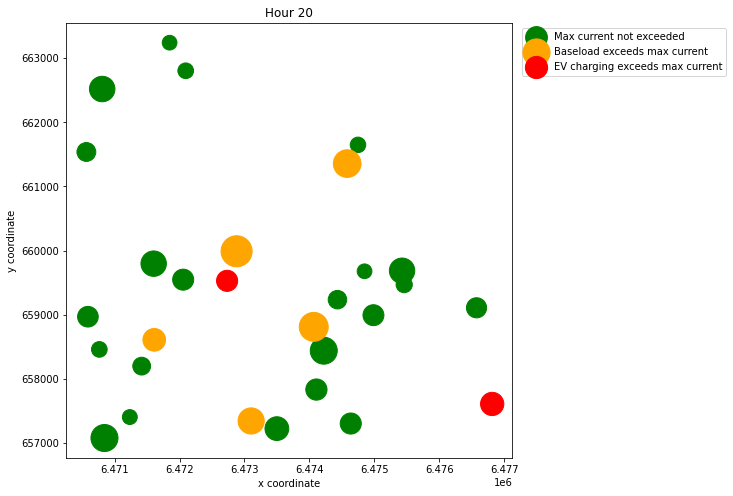

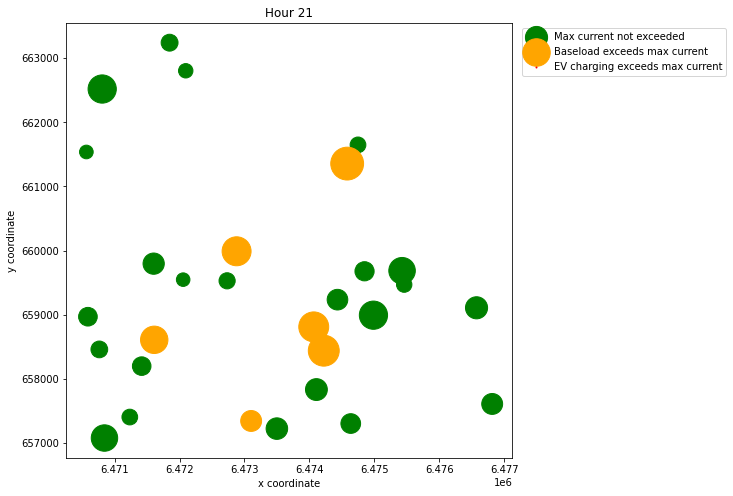

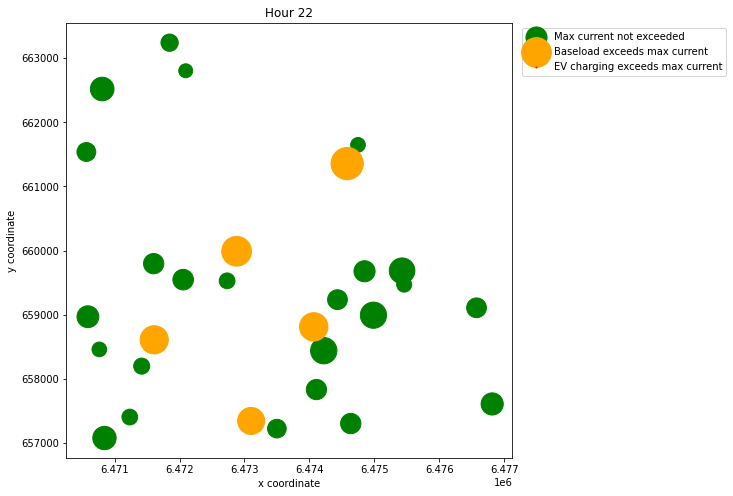

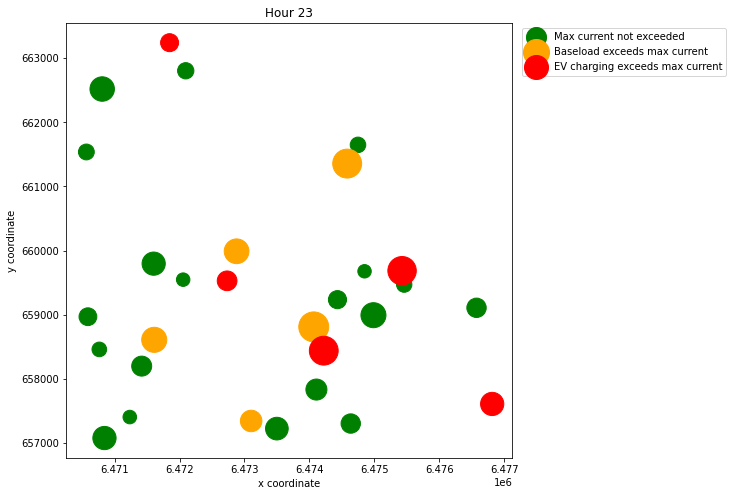

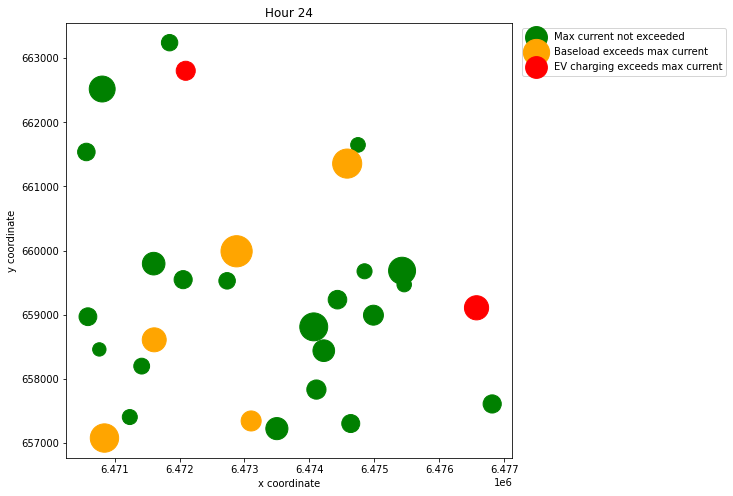

In [120]:
for i in range(24):
  mini = train[["cadaster","x","y","max_current",str(i)+"_x",str(i)+"_y"]]

  mini["current"] = mini[str(i)+"_x"]+mini[str(i)+"_y"]
  mini["orange"] = mini[str(i)+"_y"]>mini["max_current"]
  mini["red"] = mini["current"]>mini["max_current"]
  green = mini[np.logical_and(mini["orange"]==False, mini["red"]==False)]
  orange = mini[mini["orange"] == True]
  red = mini[np.logical_and(mini["orange"]==False, mini["red"]==True)]
  data = (green, orange, red)
  colors = ("green", "orange", "red")
  legends = ("Max current not exceeded", "Baseload exceeds max current", "EV charging exceeds max current")
  plt.figure(figsize=(8,8))
  for dt, col, leg in zip(data, colors, legends):
    #print(dt, col, leg)
    plt.scatter(dt.x, dt.y, s=dt["current"]*5, c=col, label=leg)
    plt.title("Hour "+str(i+1))
    plt.xlabel("x coordinate")
    plt.ylabel("y coordinate")
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
  plt.savefig("scatter/scatter"+str(i)+".png", bbox_inches='tight')
  #plt.show()

In [121]:
import imageio
images = []
for i in range(24):
    images.append(imageio.imread("scatter"+str(i)+".png"))
imageio.mimsave('scatter/charging.gif', images, duration=0.5)

In [124]:
!zip -r /content/file.zip /content/scatter
from google.colab import files
files.download("/content/file.zip")

  adding: content/scatter/ (stored 0%)
  adding: content/scatter/scatter5.png (deflated 7%)
  adding: content/scatter/scatter17.png (deflated 6%)
  adding: content/scatter/scatter12.png (deflated 6%)
  adding: content/scatter/scatter2.png (deflated 7%)
  adding: content/scatter/scatter3.png (deflated 7%)
  adding: content/scatter/scatter8.png (deflated 6%)
  adding: content/scatter/scatter11.png (deflated 6%)
  adding: content/scatter/scatter13.png (deflated 6%)
  adding: content/scatter/scatter10.png (deflated 6%)
  adding: content/scatter/scatter20.png (deflated 6%)
  adding: content/scatter/scatter23.png (deflated 7%)
  adding: content/scatter/scatter6.png (deflated 6%)
  adding: content/scatter/scatter14.png (deflated 6%)
  adding: content/scatter/scatter18.png (deflated 6%)
  adding: content/scatter/scatter16.png (deflated 6%)
  adding: content/scatter/charging.gif (deflated 51%)
  adding: content/scatter/scatter21.png (deflated 6%)
  adding: content/scatter/scatter1.png (deflated

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>